In [1]:
import sys
import torch
sys.path.append('../')

import matplotlib.pyplot as plt
import numpy as np

from scripts.RNTN_v2 import *

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Working on {}'.format(device))

Working on cpu


## Accuracy with d=30

In [3]:
net = RNTN(device, len(word2idx), d=30)
net.to(device)

RNTN(
  (L): Embedding(22349, 30)
  (W): Linear(in_features=60, out_features=30, bias=True)
  (Ws): Linear(in_features=30, out_features=5, bias=True)
  (lSoftmax): LogSoftmax()
)

In [4]:
filePath = '../savedModels/d30/net_{}.pth'
devAllArr = []
devRootArr = []

epochs = np.arange(100, 5001, 100)

for e in epochs:
    devAllAcc, devRootAcc = getAccuracyScores(net, bank['dev'], device, filePath.format(e))
    devAllArr.append(devAllAcc)
    devRootArr.append(devRootAcc)

d30DevAcc = np.vstack([epochs, devAllArr, devRootArr])
np.savetxt('../data/d30DevAcc.csv', d30DevAcc, delimiter=',')

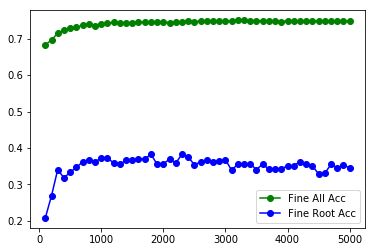

In [5]:
d30DevAcc = np.genfromtxt('../data/d30DevAcc.csv', delimiter=',')
plt.figure()
plt.plot(d30DevAcc[0], d30DevAcc[1], 'go-', label='Fine All Acc')
plt.plot(d30DevAcc[0], d30DevAcc[2], 'bo-', label='Fine Root Acc')
plt.legend()
plt.show()

In [6]:
testAllAcc, testRootAcc = getAccuracyScores(net, bank['test'], device, '../savedModels/d30/net_5000.pth')
print('TEST: Fine ALL: {}'.format(testAllAcc))
print('TEST: Fine Root: {}'.format(testRootAcc))

TEST: Fine ALL: 0.7458232445520581
TEST: Fine Root: 0.3552036199095023


## Compare fineAll and fineRootTarget

In [7]:
allFilePath = '../savedModels/d30/fineAll/net_{}.pth'
rootFilePath = '../savedModels/d30/fineRoot/net_{}.pth'
devAllAllArr = []
devAllRootArr = []
devRootAllArr = []
devRootRootArr = []

epochs = np.arange(50, 1001, 50)

for e in epochs:
    devAllAcc, devRootAcc = getAccuracyScores(net, bank['dev'], device, allFilePath.format(e))
    devAllAllArr.append(devAllAcc)
    devAllRootArr.append(devRootAcc)
    
    devAllAcc, devRootAcc = getAccuracyScores(net, bank['dev'], device, rootFilePath.format(e))
    devRootAllArr.append(devAllAcc)
    devRootRootArr.append(devRootAcc)

compareAllAndRoot = np.vstack([epochs, devAllAllArr, devAllRootArr, devRootAllArr, devRootRootArr])
np.savetxt('../data/compareAllAndRoot.csv', compareAllAndRoot, delimiter=',')

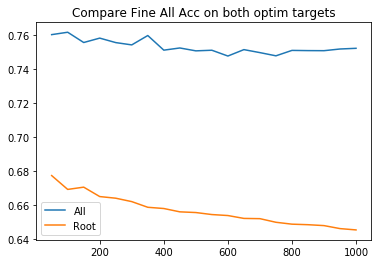

In [8]:
compareAllAndRoot = np.genfromtxt('../data/compareAllAndRoot.csv', delimiter=',')
plt.figure()
plt.plot(compareAllAndRoot[0], compareAllAndRoot[1], label='All')
plt.plot(compareAllAndRoot[0], compareAllAndRoot[3], label='Root')
plt.legend()
plt.title('Compare Fine All Acc on both optim targets')
plt.show()

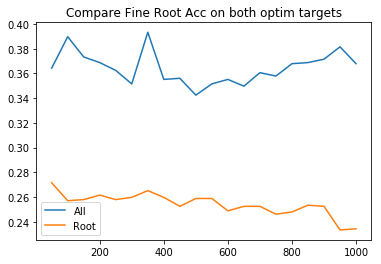

In [9]:
plt.figure()
plt.plot(compareAllAndRoot[0], compareAllAndRoot[2], label='All')
plt.plot(compareAllAndRoot[0], compareAllAndRoot[4], label='Root')
plt.legend()
plt.title('Compare Fine Root Acc on both optim targets')
plt.show()

In [10]:
testAllAcc, testRootAcc = getAccuracyScores(net, bank['test'], device, '../savedModels/d30/fineAll/net_1000.pth')
print('TEST: All: Fine ALL: {}'.format(testAllAcc))
print('TEST: All: Fine Root: {}'.format(testRootAcc))
print('------------------------------------------')

testAllAcc, testRootAcc = getAccuracyScores(net, bank['test'], device, '../savedModels/d30/fineRoot/net_1000.pth')
print('TEST: Root: Fine ALL: {}'.format(testAllAcc))
print('TEST: Root: Fine Root: {}'.format(testRootAcc))

TEST: All: Fine ALL: 0.7486319612590799
TEST: All: Fine Root: 0.34479638009049773
------------------------------------------
TEST: Root: Fine ALL: 0.6437409200968524
TEST: Root: Fine Root: 0.2524886877828054
